In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

# set max rows displayed
pd.set_option('display.max_rows', 300)

In [2]:
# import 2nd dataset from lloyds
bank = pd.read_csv('simulated_transaction_2024.csv')

In [33]:
bank.head(10)

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.00,1584.00,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.00,1950.00,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.00,-780.00,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.00,780.00,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.00,1825.00,NaN,Fat Face
5,01/01/2023,00:00,203466392.0,4607.66,2841.66,NaN,Lavender Primary
6,01/01/2023,00:00,768271776.0,3620.00,1950.00,NaN,A Cut Above
7,01/01/2023,00:00,768271776.0,2840.00,-780.00,215404070.0,NaN
8,01/01/2023,00:00,215404070.0,1965.00,780.00,768271776.0,NaN
9,01/01/2023,00:00,456221621.0,2831.00,1675.00,NaN,Tesco


In [112]:
personal_accounts=bank['Account No'].unique()

print(personal_accounts)
print(f'Number of individuals',len(personal_accounts))

[6.78330503e+08 4.72213568e+08 2.83027736e+08 6.24500124e+08
 2.03466392e+08 7.68271776e+08 2.15404070e+08 4.56221621e+08
 3.50921975e+08 4.55831435e+08 4.42079728e+08 8.32564361e+08
 4.07574996e+08 1.72084472e+08 4.42070890e+08 6.05711527e+08
 7.44968736e+08 8.65748375e+08 5.48907062e+08 5.22188082e+08
 7.86141370e+08 6.16924659e+08 9.79135922e+08 3.70757362e+08
 3.99144202e+08 6.37433131e+08 7.54141345e+08 4.12823730e+08
 1.19993184e+08 3.84497904e+08 2.98000165e+08 2.41459011e+08
 6.04288474e+08 7.20742759e+08 2.00080192e+08 1.83888402e+08
 5.32478725e+08 6.80773155e+08 2.15426302e+08 2.85428103e+08
 9.25037906e+08 8.92354433e+08 8.20686957e+08 7.44398361e+08
 1.45387690e+08 4.14805878e+08 7.76431321e+08 6.66952234e+08
 3.45582855e+08 3.08068836e+08 7.22971557e+08 1.83546640e+08
 1.43606916e+08 7.05848712e+08 2.14339619e+08 5.65175333e+08
 1.68414279e+08 4.35313070e+08 4.26466211e+08 3.11467864e+08
 9.13801979e+08 1.08481285e+08 9.94214354e+08 4.75277431e+08
 4.54356905e+08 6.608742

## Investigate Categories

In [9]:
merchants = bank['Third Party Name'].unique()
print(merchants)

# print number of unique merchants
print('Number of unique merchants: ', len(merchants))

['Westport Care Home' 'Barbiee Boutique' nan 'Fat Face' 'Lavender Primary'
 'A Cut Above' 'Tesco' 'Brilliant Brushes' 'Costa Coffee'
 'Premier Finance' 'North Face' 'Craftastic' 'Fitted Stitch' 'Selfridges'
 'Starbucks' 'The Crown' 'Cass Art' 'Green Park Academy' 'Rose & Crown'
 'Kings Arms' 'Sunny Care Nursery' 'A Yarn Story' 'Pets Corner'
 'Lavender Fields' 'Victoria Park' 'Halifax' 'LBG' 'Blizzard' 'Xbox'
 'Mojang Studios' 'PureGym' 'Disney' 'Netflix' 'Grand Union BJJ' 'Amazon'
 'SquareOnix' 'Deliveroo' 'JustEat' 'Coop Local' 'Sainsbury' 'AMAZON'
 'The Works' "Blackwell's" 'Topshop' 'Matalan' 'Foyles' 'Wool'
 'Hobby Lobby' 'Revella' 'Sainsbury Local' 'Loosely Fitted'
 'Stitch By Stitch' 'Coffee #1' 'Hobbycraft' 'Lloyds Pharmacy'
 'Gamestation' 'CeX' 'Etsy' 'Five Senses Art' 'Sports Direct' 'Boots'
 'Reebok' 'JD Sports' 'Head' 'Frankie & Bennies' 'Gap Kids'
 'University College Hospital' 'CPA' 'Happy Days Home' 'Pets at Home'
 'Jollyes' 'Collector Cave' 'Vision Express' 'Green Park'


- Got roughly the same amount of merchants as in the last dataset but with actual business names.

#### Pricing distributions across similar merchants - supermarkets

In [29]:
# drop transactions where 'Amount' is positive as these are not spending out of the account
merchant_spending = bank[bank['Amount'] < 0]

# keep rows where 'Third Party Account No' is null as these aren't payments to personal accounts
merchant_spending = merchant_spending[merchant_spending['Third Party Account No'].isnull()]


merchant_spending.head(10)

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
495,01/01/2023,00:00,355733816.0,526.00,-664.0,NaN,Halifax
496,01/01/2023,00:00,472213568.0,2412.00,-600.0,NaN,LBG
497,01/01/2023,00:00,624500124.0,2572.00,-654.0,NaN,LBG
498,01/01/2023,00:00,203466392.0,3935.66,-672.0,NaN,Halifax
499,01/01/2023,00:00,768271776.0,2208.00,-632.0,NaN,LBG
500,01/01/2023,00:00,564744955.0,938.00,-572.0,NaN,Halifax
501,01/01/2023,00:00,675806859.0,452.00,-648.0,NaN,LBG
502,01/01/2023,00:00,456221621.0,2167.00,-664.0,NaN,Halifax
503,01/01/2023,00:00,350921975.0,1333.50,-665.0,NaN,Halifax
504,01/01/2023,00:00,331450202.0,776.00,-631.0,NaN,LBG


In [30]:
# select only the transactions that are from the merchant 'Tesco' and 'Sainsbury Local'
tesco = merchant_spending[merchant_spending['Third Party Name'] == 'Tesco']
sainsbury_local = merchant_spending[merchant_spending['Third Party Name'] == 'Sainsbury Local']
sainsbury = merchant_spending[merchant_spending['Third Party Name'] == 'Sainsbury']

supermarkets = pd.concat([sainsbury_local['Amount'].describe(), tesco['Amount'].describe(), sainsbury['Amount'].describe()],axis=1)
supermarkets.columns = ['Sainsbury Local', 'Tesco', 'Sainsbury']
supermarkets

,Sainsbury Local,Tesco,Sainsbury
count,3155.000000,33905.000000,3117.000000
mean,-42.450051,-75.041815,-43.679734
std,42.938658,50.944684,43.357148
min,-320.750000,-348.350000,-303.800000
25%,-57.905000,-102.440000,-60.280000
50%,-31.120000,-62.980000,-31.310000
75%,-11.935000,-38.270000,-11.970000
max,-0.010000,-0.010000,-0.010000


#### Pricing distributions over coffee shops

In [31]:
starbucks = merchant_spending[merchant_spending['Third Party Name'] == 'Starbucks']
costa_coffee = merchant_spending[merchant_spending['Third Party Name'] == 'Costa Coffee']
coffee_1 = merchant_spending[merchant_spending['Third Party Name'] == 'Coffee #1']

coffee = pd.concat([starbucks['Amount'].describe(), costa_coffee['Amount'].describe(), coffee_1['Amount'].describe()],axis=1)
coffee.columns = ['Starbucks', 'Costa Coffee', 'Coffee #1']
coffee

,Starbucks,Costa Coffee,Coffee #1
count,4821.000000,677.000000,2298.000000
mean,-5.984505,-5.988774,-5.995735
std,1.509033,0.945160,1.785399
min,-90.000000,-8.300000,-80.000000
25%,-6.500000,-6.500000,-6.500000
50%,-5.800000,-5.800000,-5.750000
75%,-5.400000,-5.350000,-5.400000
max,-2.800000,-2.800000,-2.800000


- Beginning to see rough alignment in terms of spending mean and variance

## Investigate Missing Values

In [35]:
# null values across each feature
bank.isnull().sum()

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64

##### Null third party account id

In [105]:
# display null values in 'Third Party Account No' using isnull()
null_beneficiary_accounts=bank[bank['Third Party Account No'].isnull()]
null_beneficiary_accounts

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,2023-01-01,00:00,678330503.0,2971.000000,1584.00,NaN,Westport Care Home
1,2023-01-01,00:00,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique
4,2023-01-01,00:00,624500124.0,3226.000000,1825.00,NaN,Fat Face
5,2023-01-01,00:00,203466392.0,4607.660000,2841.66,NaN,Lavender Primary
6,2023-01-01,00:00,768271776.0,3620.000000,1950.00,NaN,A Cut Above
...,...,...,...,...,...,...,...
230591,2023-12-06,20:54,581655972.0,45935.206861,-41.06,NaN,Tesco
230592,2023-12-06,20:55,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local
230593,2023-12-06,21:05,824916823.0,9709.172159,-32.94,NaN,Deliveroo
230594,2023-12-06,21:13,366550080.0,26834.165794,-19.25,NaN,Amazon


- NaNs in the 'Third Party Account No' indicate a transaction at a merchant. If these are negative - indicates a payment to the merchant, if positive it indicates and payment from the merchant - most likely a refund or salary.

#### Null third party name

In [39]:
# display null values in 'Third Party Account No'
null_merchant_name=bank[bank['Third Party Name'].isnull()]
null_merchant_name

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
2,01/01/2023,00:00,472213568.0,3012.000000,-780.00,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.000000,780.00,472213568.0,NaN
7,01/01/2023,00:00,768271776.0,2840.000000,-780.00,215404070.0,NaN
8,01/01/2023,00:00,215404070.0,1965.000000,780.00,768271776.0,NaN
11,01/01/2023,00:00,350921975.0,1998.500000,-460.00,633362865.0,NaN
...,...,...,...,...,...,...,...
228822,04/12/2023,01:08,336171116.0,428.428400,380.00,973388795.0,NaN
228859,04/12/2023,03:09,349614277.0,748.375100,-950.00,871200314.0,NaN
228860,04/12/2023,03:09,871200314.0,539.105124,950.00,349614277.0,NaN
229016,04/12/2023,08:34,215426302.0,1118.800404,-43.20,NaN,NaN


- NaNs in third part name/merchant indicate a personal payment to another account - e.g. rent or potentially fraud?

#### Null values in balance

In [51]:
null_balance = bank[bank['Balance'].isnull()]   
null_balance.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
1392,01/01/2023,00:00,246753533.0,NaN,-100.00,NaN,Grand Union BJJ
4132,01/01/2023,00:00,726913482.0,NaN,-5.99,NaN,Mojang Studios
4593,01/01/2023,00:00,335698481.0,NaN,-18.99,NaN,PureGym
4771,01/01/2023,09:49,706250160.0,NaN,-60.92,NaN,The Works
4799,01/01/2023,10:01,647472692.0,NaN,-27.96,NaN,The Works


##### Null transaction amount

In [78]:
null_amount = bank[bank['Amount'].isnull()] 
null_amount

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
949,2023-01-01,00:00,857754342.0,2745.750000,NaN,NaN,LBG
1821,2023-01-01,00:00,424397946.0,3358.010000,NaN,NaN,PureGym
3937,2023-01-01,00:00,987656636.0,844.020000,NaN,NaN,Disney
4071,2023-01-01,00:00,399538448.0,3506.070000,NaN,NaN,Amazon
5443,2023-01-01,14:33,653640811.0,3288.740000,NaN,NaN,Blackwell's
10906,2023-01-11,09:21,282837512.0,313.340900,NaN,NaN,JD Sports
10951,2023-01-11,09:48,384497904.0,1053.003650,NaN,NaN,Gamestation
12120,2023-01-13,16:41,679911053.0,2152.700088,NaN,NaN,Tesco
13694,2023-01-16,13:43,405416860.0,2096.412650,NaN,NaN,Gamestation
14117,2023-01-17,10:30,620227043.0,1401.458861,NaN,NaN,Blackwell's


#### Null sender account number

In [50]:
null_sender_account = bank[bank['Account No'].isnull()]   
null_sender_account.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
527,01/01/2023,00:00,NaN,813.00,-1143.00,NaN,Halifax
1295,01/01/2023,00:00,NaN,2284.03,-18.99,NaN,PureGym
1335,01/01/2023,00:00,NaN,1542.03,-18.99,NaN,PureGym
1563,01/01/2023,00:00,NaN,3351.01,-15.99,NaN,Netflix
1703,01/01/2023,00:00,NaN,3785.78,-18.99,NaN,PureGym


#### Null timestamp

In [104]:
null_timestamp = bank[bank['Timestamp'].isnull()]
null_timestamp.head()    

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
2734,2023-01-01,NaN,593191200.0,1490.0200,-14.99,NaN,Blizzard
6129,2023-01-02,NaN,572384506.0,3193.0400,-9.99,NaN,The Works
6527,2023-01-03,NaN,196289502.0,855.8792,-47.56,NaN,Tesco
6693,2023-01-03,NaN,421475159.0,1375.4530,-99.98,NaN,Gamestation
7227,2023-01-04,NaN,760704118.0,2636.7748,-221.89,NaN,Fat Face


#### Null dates

In [102]:
null_dates = bank[bank['Date'].isnull()]    
null_dates.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,2023-01-01,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home
1,2023-01-01,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique
2,2023-01-01,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN
3,2023-01-01,00:00,283027736.0,1787.0,780.0,472213568.0,NaN
4,2023-01-01,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face


## Calculating salaries of individuals

In [67]:
# max and min dates in bank dataset
# convert 'Date' to datetime format'
bank['Date'] = pd.to_datetime(bank['Date'],dayfirst=True)

# find the max and min dates in the dataset
max_date = bank['Date'].max()
min_date = bank['Date'].min()

print('Max date: ', max_date)
print('Min date: ', min_date)

Max date:  2023-12-06 00:00:00
Min date:  2023-01-01 00:00:00


In [122]:
# Just get positive transactions into the balance

print('Number of unique accounts in original bank: ', len(bank['Account No'].unique()))

bank_amount_incomings = bank[bank['Amount'] > 0]

# remove rows with null values in 'Third Party Name'
bank_amount_incomings = bank_amount_incomings[bank_amount_incomings['Third Party Name'].notnull()]

#check if there are any null values in the dataset
bank_amount_incomings.isnull().sum()

# print number of unique accounts
print('Number of unique accounts after filtering for incomings only: ', len(bank_amount_incomings['Account No'].unique()))

bank_amount_incomings.head(10)

Number of unique accounts in original bank:  977
Number of unique accounts after filtering for incomings only:  617


,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,2023-01-01,00:00,678330503.0,2971.00,1584.00,NaN,Westport Care Home
1,2023-01-01,00:00,472213568.0,3792.00,1950.00,NaN,Barbiee Boutique
4,2023-01-01,00:00,624500124.0,3226.00,1825.00,NaN,Fat Face
5,2023-01-01,00:00,203466392.0,4607.66,2841.66,NaN,Lavender Primary
6,2023-01-01,00:00,768271776.0,3620.00,1950.00,NaN,A Cut Above
9,2023-01-01,00:00,456221621.0,2831.00,1675.00,NaN,Tesco
10,2023-01-01,00:00,350921975.0,2458.50,1842.50,NaN,Brilliant Brushes
12,2023-01-01,00:00,455831435.0,3253.10,1620.10,NaN,Costa Coffee
15,2023-01-01,00:00,832564361.0,5376.00,3542.00,NaN,Premier Finance
16,2023-01-01,00:00,407574996.0,3151.00,1609.00,NaN,Fat Face


In [129]:
# filter rows for only 2nd month of the year
bank_feb = bank_amount_incomings[bank_amount_incomings['Date'].dt.month == 2]

# get max and min dates in february
max_date_feb = bank_feb['Date'].max()
min_date_feb = bank_feb['Date'].min()

print('Max date in February: ', max_date_feb)
print('Min date in February: ', min_date_feb)

bank_feb.tail(15)


Max date in February:  2023-02-28 00:00:00
Min date in February:  2023-02-01 00:00:00


,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
38879,2023-02-28,00:00,833499132.0,2556.168350,2708.00,NaN,Halifax
38882,2023-02-28,00:00,859264768.0,1815.465942,1545.00,NaN,Vision Express
38885,2023-02-28,00:00,788740658.0,2537.061150,1675.00,NaN,Matalan
38886,2023-02-28,00:00,106601471.0,2845.874540,1675.00,NaN,Hobbycraft
38887,2023-02-28,00:00,696333897.0,1716.316000,1842.50,NaN,Jollyes
38890,2023-02-28,00:00,558875206.0,3076.427350,3125.00,NaN,CPA
38891,2023-02-28,00:00,331450202.0,3791.867700,3087.75,NaN,CPA
38892,2023-02-28,00:00,683078800.0,3375.129867,3126.00,NaN,LBG
38895,2023-02-28,00:00,651756497.0,6075.964878,4375.00,NaN,CPA
38896,2023-02-28,00:00,435984758.0,2746.848874,2250.00,NaN,LBG


- Potentially need to remove last month as it only goes up to the 6th so may miss some people's incomes coming in as they seem to come in throughout the month.

In [136]:
# drop transactions in december
bank_amount_incomings = bank_amount_incomings[bank_amount_incomings['Date'].dt.month != 12]

# group by Account No and sum the 'Amount' for each account
income_per_account = bank_amount_incomings.groupby('Account No')['Amount'].sum()

# calculate the annual income for each account
incomes=(income_per_account/11)*12 # multiply by 12 to get annual income
incomes_monthly = income_per_account/11

Account No
101531259.0    18510.0
104832000.0    20100.0
106601471.0    20100.0
108481285.0    19008.0
108563213.0    44988.0
                ...   
994947671.0    21456.0
995615876.0    20796.0
996042490.0    45000.0
998390769.0    19500.0
999752672.0    32496.0
Name: Amount, Length: 616, dtype: float64

<Axes: xlabel='Amount', ylabel='Density'>

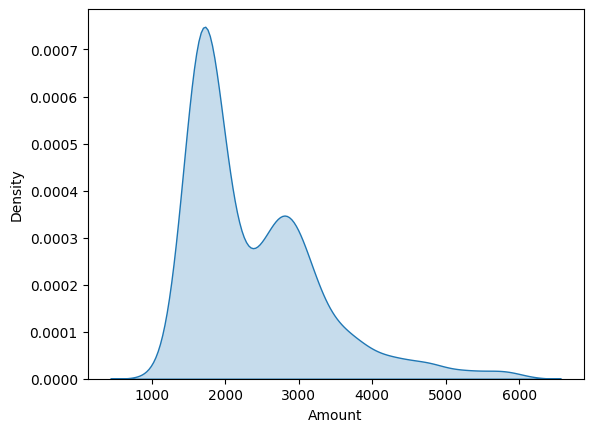

In [137]:
# kde plot of income per account
sns.kdeplot(incomes_monthly, fill=True)